**Domain: Health Insurance**

**Medical Cost Prediction:A Machine Learning Approach Using Health Insurance Claims**


**Importing the Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Data Description:**


The data at hand contains medical costs of people characterized by certain attributes.

**Attribute Information:**


*  age: Age of primary beneficiary
*   sex: Insurance contractor gender, female / male


*  bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg /  m2
 ) using the ratio of height to weight, ideally 18.5 to 24.9

*  children: Number of children covered by health insurance / Number of dependents
*   smoker: Smoker / Non - smoker


* region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.




*   charges: Individual medical costs billed by health insurance.






Data Collection & Analysis

In [2]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('/content/Medical Cost Insurance.csv')

In [3]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [5]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
- Sex
- Smoker
- Region

In [6]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [7]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-8-28228e9c3528>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


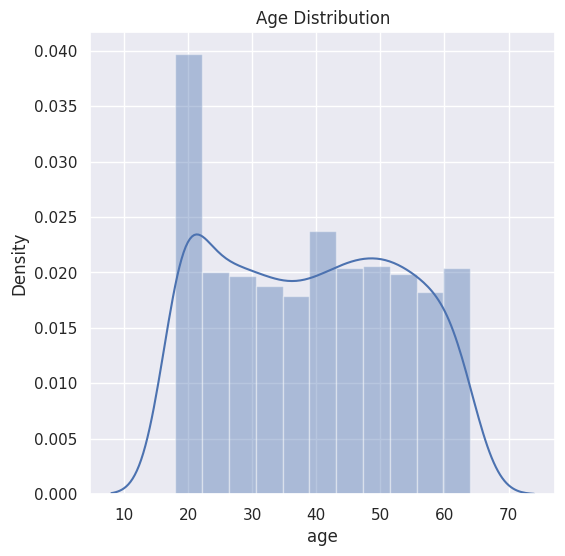

In [8]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

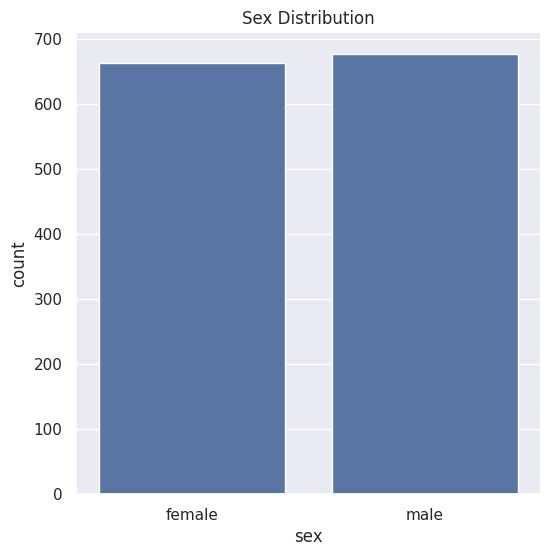

In [9]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [10]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<ipython-input-11-81b69896b0d5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


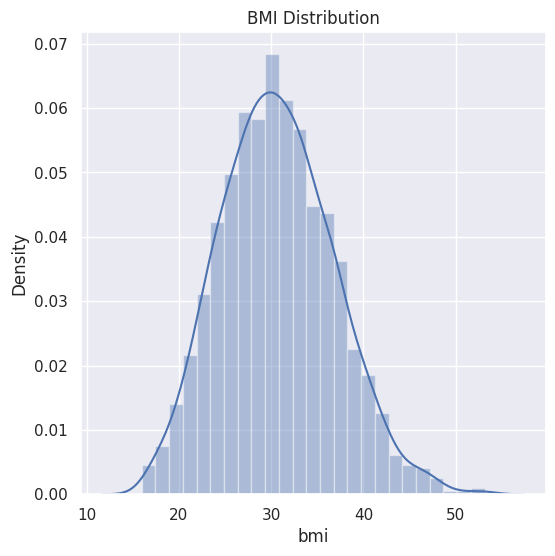

In [11]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

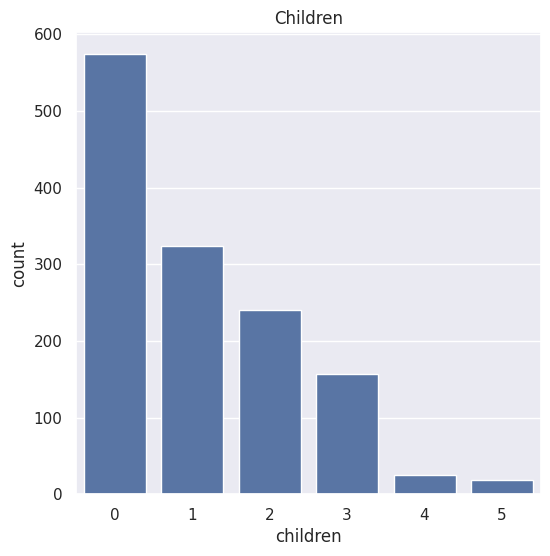

In [12]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [13]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

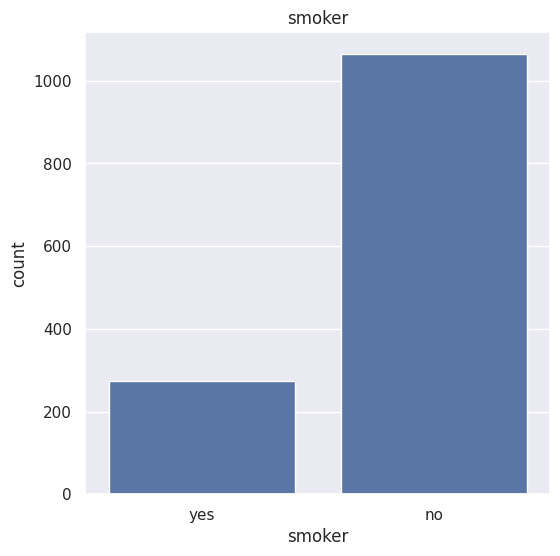

In [14]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [15]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

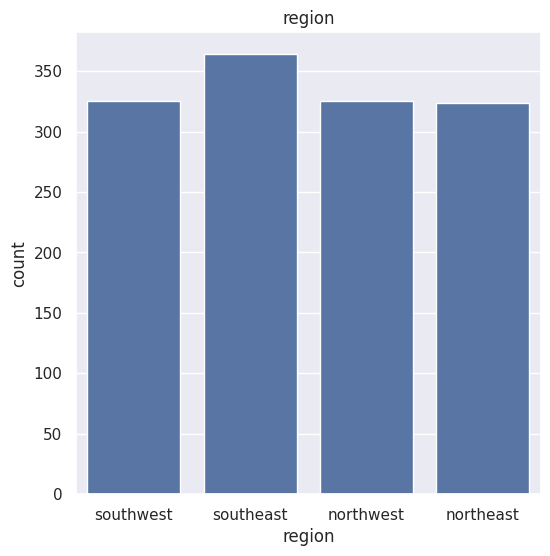

In [16]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [17]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<ipython-input-18-a2fe9b394a51>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


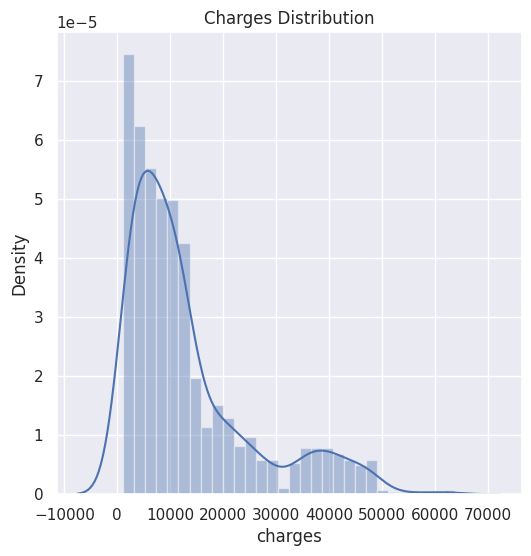

In [18]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

**There might be few outliers in Charges but then we cannot say that the value is an outlier as there might be cases in which Charge for medical was very les actually!**

<ipython-input-19-9008b73b83e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age',y='charges',data=insurance_dataset,palette='husl')


<Axes: title={'center': 'Age vs Charge'}, xlabel='age', ylabel='charges'>

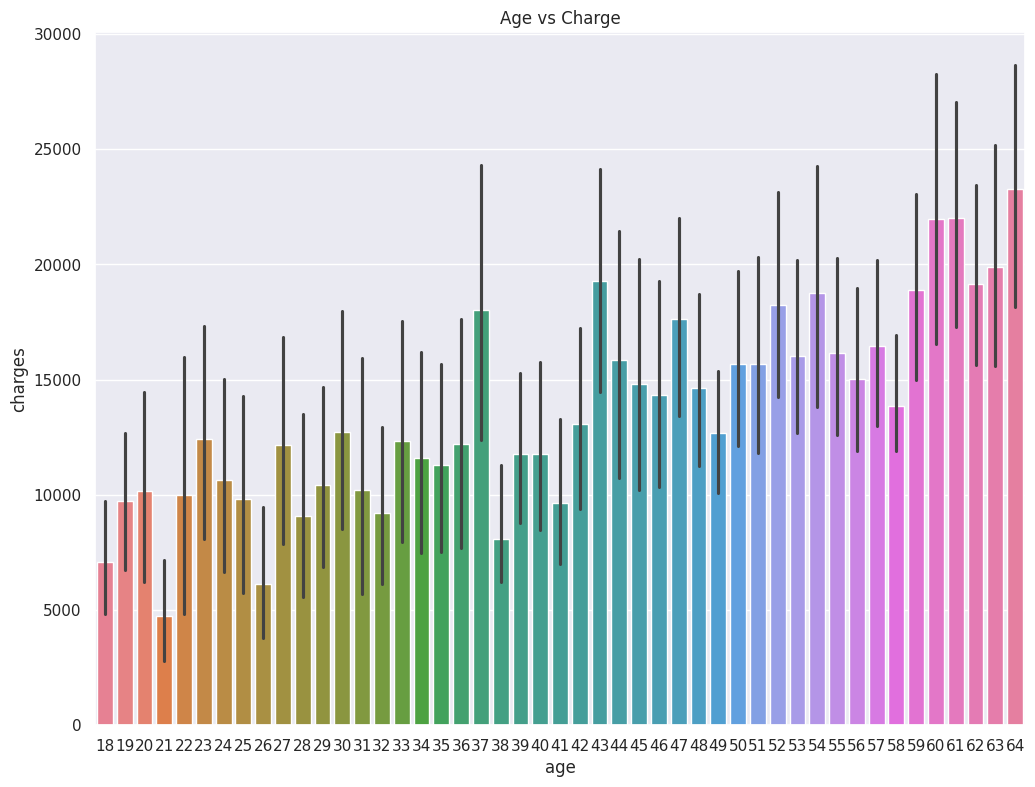

In [19]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=insurance_dataset,palette='husl')

<ipython-input-20-95fee8f3bd62>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region',y='charges',data=insurance_dataset,palette='Set3')


<Axes: title={'center': 'Region vs Charge'}, xlabel='region', ylabel='charges'>

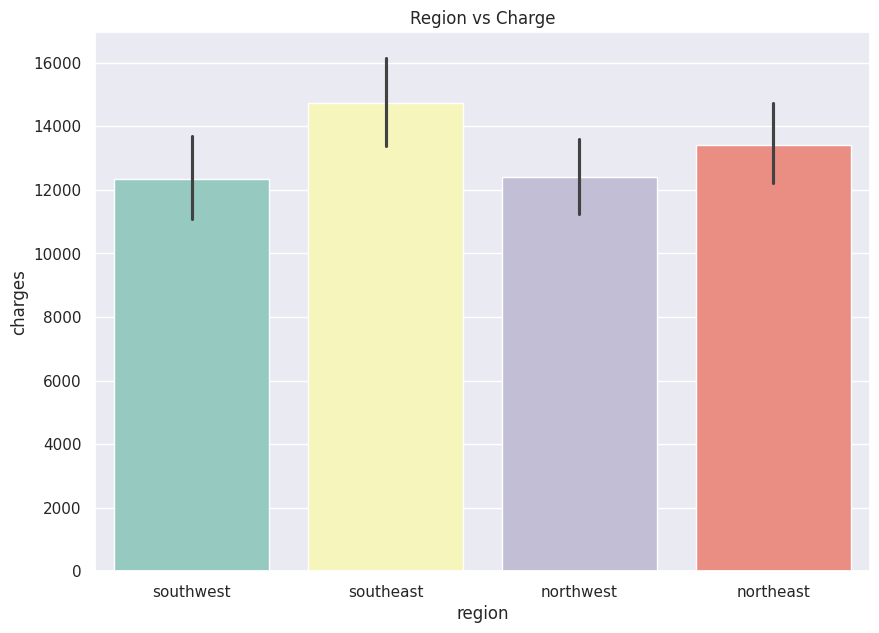

In [20]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=insurance_dataset,palette='Set3')

Text(0.5, 1.0, 'BMI VS Charge')

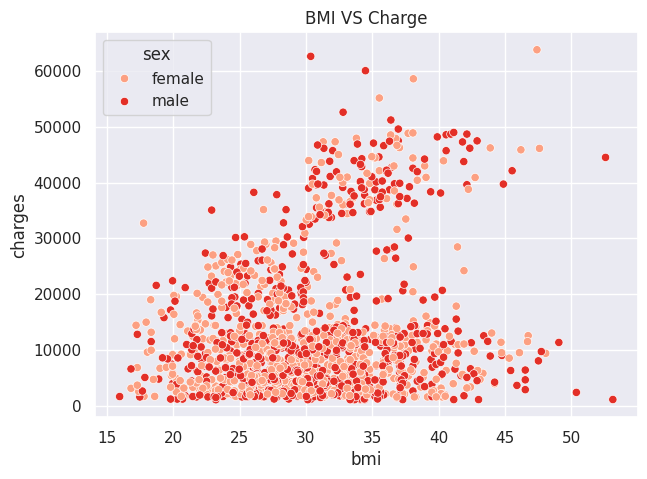

In [21]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=insurance_dataset,palette='Reds')
plt.title('BMI VS Charge')

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

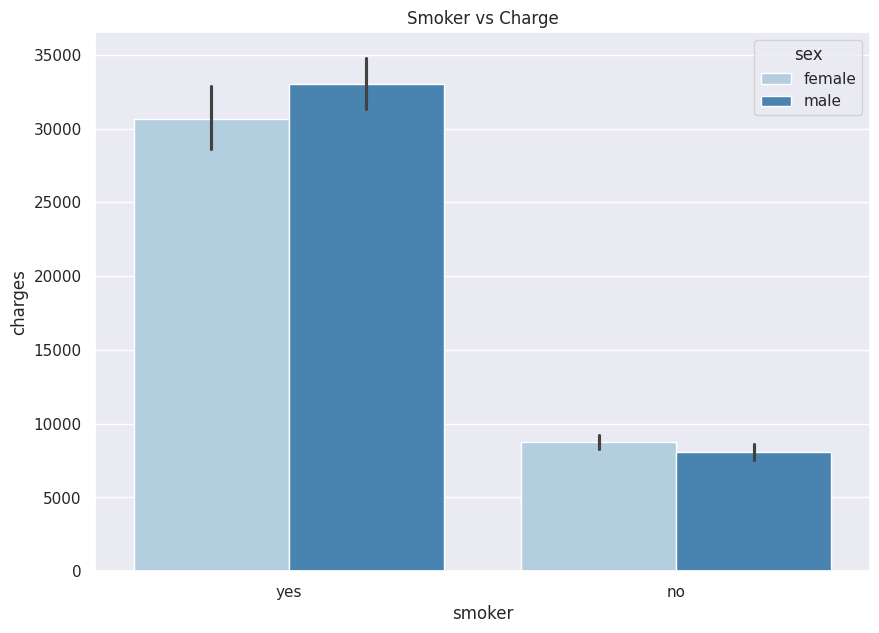

In [22]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=insurance_dataset,palette='Blues',hue='sex')

<ipython-input-23-88e8d4ee04f2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex',y='charges',data=insurance_dataset,palette='Set1')


<Axes: title={'center': 'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

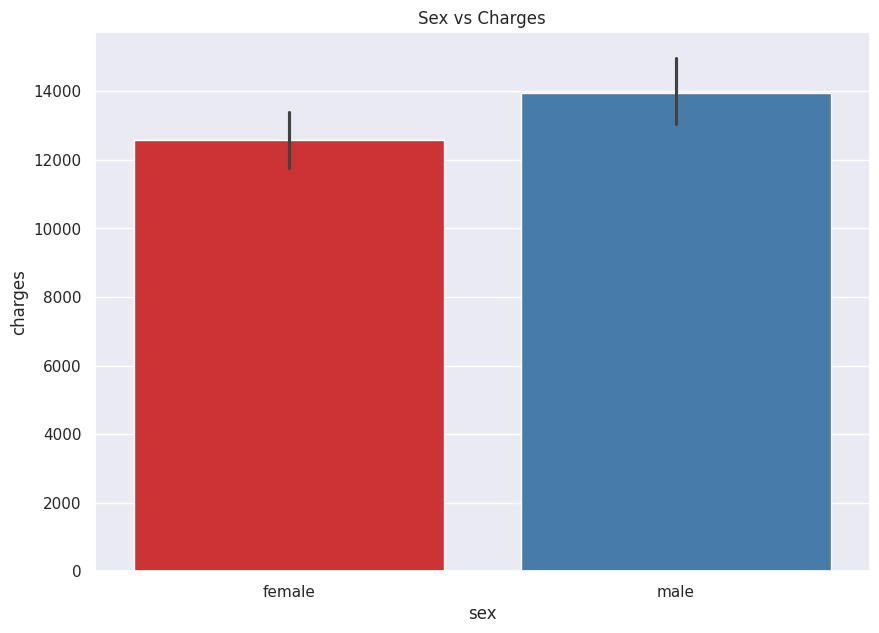

In [23]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=insurance_dataset,palette='Set1')

Data Pre-Processing

Encoding the categorical features

In [24]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

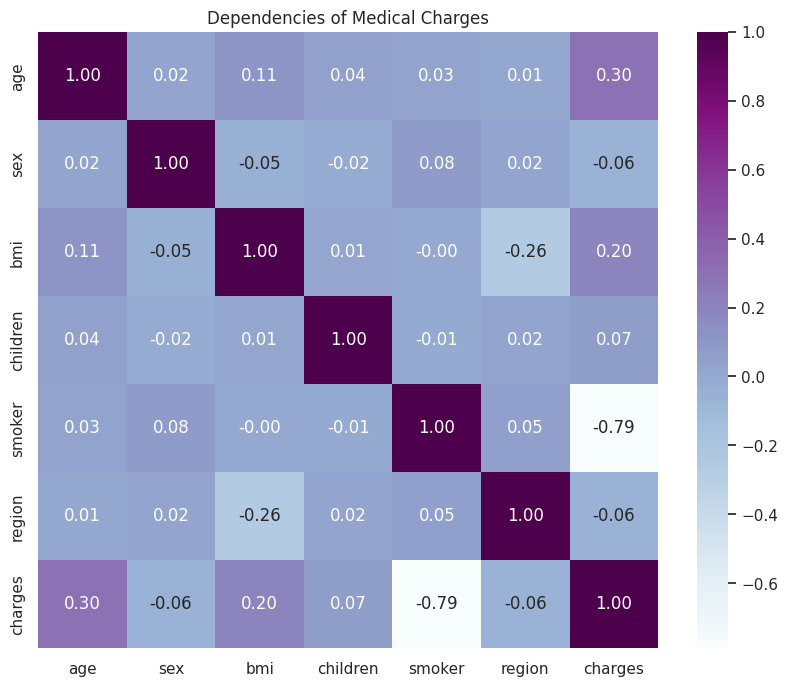

In [25]:
corr =  insurance_dataset.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
plt.show()

**Smoker, BMI and Age are most important factor that determnines - Charges
Also we see that Sex, Children and Region do not affect the Charges. We might drop these 3 columns as they have less correlation**

Splitting the Features and Target

In [27]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [28]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [29]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training data & Testing Data

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

Model Training

Linear Regression

In [33]:
# loading the Linear Regression model
regressor = LinearRegression()

In [34]:
regressor.fit(X_train_std, Y_train)

LinearRegression()

Model Evaluation

In [35]:
# prediction on training data
training_data_prediction =regressor.predict(X_train_std)

In [36]:
# Training data evaluation
r2_train_linear = metrics.r2_score(Y_train, training_data_prediction)
mae_train = metrics.mean_absolute_error(Y_train, training_data_prediction)
mse_train = metrics.mean_squared_error(Y_train, training_data_prediction)
rmse_train = np.sqrt(mse_train)

print("Training data metrics:")
print("R-squared: {:.4f}".format(r2_train_linear))
print("MAE: {:.4f}".format(mae_train))
print("MSE: {:.4f}".format(mse_train))
print("RMSE: {:.4f}".format(rmse_train))


Training data metrics:
R-squared: 0.7413
MAE: 4214.8974
MSE: 37337214.4108
RMSE: 6110.4185


In [37]:
# prediction on test data
test_data_prediction =regressor.predict(X_test_std)

In [38]:
# Test data evaluation
r2_test_linear = metrics.r2_score(Y_test, test_data_prediction)
mae_test = metrics.mean_absolute_error(Y_test, test_data_prediction)
mse_test = metrics.mean_squared_error(Y_test, test_data_prediction)
rmse_test = np.sqrt(mse_test)

print("\nTest data metrics:")
print("R-squared: {:.4f}".format(r2_test_linear))
print("MAE: {:.4f}".format(mae_test))
print("MSE: {:.4f}".format(mse_test))
print("RMSE: {:.4f}".format(rmse_test))




Test data metrics:
R-squared: 0.7830
MAE: 4190.2202
MSE: 33685623.3541
RMSE: 5803.9317


**Laso Regression**

In [39]:
from sklearn.linear_model import LinearRegression, Lasso

In [40]:
lasso_model = Lasso(alpha=1.0)

In [41]:
lasso_model.fit(X_train_std, Y_train)

Lasso()

In [42]:
 #Predict on the training set
lasso_predictions_train = lasso_model.predict(X_train_std)

In [43]:
r2_lasso_train = metrics.r2_score(Y_train, lasso_predictions_train)
mae_lasso_train = metrics.mean_absolute_error(Y_train, lasso_predictions_train)
mse_lasso_train = metrics.mean_squared_error(Y_train, lasso_predictions_train)
rmse_lasso_train = np.sqrt(mse_lasso_train)

print("Lasso Regression - Training set metrics:")
print("R-squared: {:.4f}".format(r2_lasso_train))
print("MAE: {:.4f}".format(mae_lasso_train))
print("MSE: {:.4f}".format(mse_lasso_train))
print("RMSE: {:.4f}".format(rmse_lasso_train))

Lasso Regression - Training set metrics:
R-squared: 0.7413
MAE: 4214.7732
MSE: 37337221.0440
RMSE: 6110.4191


In [44]:
#Predict on the test set
lasso_predictions_test = lasso_model.predict(X_test_std)

In [45]:
r2_lasso_test = metrics.r2_score(Y_test, lasso_predictions_test)
mae_lasso_test = metrics.mean_absolute_error(Y_test, lasso_predictions_test)
mse_lasso_test = metrics.mean_squared_error(Y_test, lasso_predictions_test)
rmse_lasso_test = np.sqrt(mse_lasso_test)

print("\nLasso Regression - Test set metrics:")
print("R-squared: {:.4f}".format(r2_lasso_test))
print("MAE: {:.4f}".format(mae_lasso_test))
print("MSE: {:.4f}".format(mse_lasso_test))
print("RMSE: {:.4f}".format(rmse_lasso_test))


Lasso Regression - Test set metrics:
R-squared: 0.7830
MAE: 4190.4745
MSE: 33689145.4800
RMSE: 5804.2351


#RandomForestRegressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Set up the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest regressor
rf = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    scoring='r2',
    n_jobs=-1,
    cv=5,
    verbose=2,
    random_state=42
)




In [47]:
# Fit the model
random_search.fit(X_train_std, Y_train)

# Best model
best_rf = random_search.best_estimator_

# Predictions for training and test sets
train_rf_predictions = best_rf.predict(X_train_std)
test_rf_predictions = best_rf.predict(X_test_std)

# Evaluation metrics for training set
r2_rf_train = r2_score(Y_train, train_rf_predictions)
mae_rf_train = mean_absolute_error(Y_train, train_rf_predictions)
mse_rf_train = mean_squared_error(Y_train, train_rf_predictions)
rmse_rf_train = np.sqrt(mse_rf_train)





Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [48]:
# Evaluation metrics for test set
r2_rf_test = r2_score(Y_test, test_rf_predictions)
mae_rf_test = mean_absolute_error(Y_test, test_rf_predictions)
mse_rf_test = mean_squared_error(Y_test, test_rf_predictions)
rmse_rf_test = np.sqrt(mse_rf_test)

In [49]:
# Display the results
print("Training set metrics:")
print("R-squared:", r2_rf_train)
print("MAE:", mae_rf_train)
print("MSE:", mse_rf_train)
print("RMSE:", rmse_rf_train)

Training set metrics:
R-squared: 0.9142265041618441
MAE: 1920.3426723754012
MSE: 12379999.320188811
RMSE: 3518.522320547194


In [50]:
print("\nTest set metrics:")
print("R-squared:", r2_rf_test)
print("MAE:", mae_rf_test)
print("MSE:", mse_rf_test)
print("RMSE:", rmse_rf_test)


Test set metrics:
R-squared: 0.8779937723614997
MAE: 2432.9314700164236
MSE: 18941312.074973725
RMSE: 4352.16177031297


#XGBRegressor

In [51]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Parameter grid for XGBoost tuning
param_dist = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinkage
    'max_depth': [3, 5, 7],  # Maximum tree depth
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight needed in a child
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a split
    'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training data
    'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
    'reg_alpha': [0, 0.1, 0.2],  # L1 regularization term on weights
    'reg_lambda': [1, 1.5, 2],  # L2 regularization term on weights
}

# Initialize the XGBoost regressor
xgb = XGBRegressor(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=10,  # Number of different combinations to try
    scoring='r2',
    n_jobs=-1,
    cv=5,  # Cross-validation with 5 folds
    verbose=2,
    random_state=42
)

# Fit the random search model
random_search.fit(X_train_std, Y_train)

# Best parameters
print("Best parameters:", random_search.best_params_)




Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 0.2, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}


In [52]:
# Best model
best_xgb = random_search.best_estimator_

# Predictions for training and test sets
train_xgb_predictions = best_xgb.predict(X_train_std)
test_xgb_predictions = best_xgb.predict(X_test_std)

# Evaluation metrics for training set
r2_xgb_train = r2_score(Y_train, train_xgb_predictions)
mae_xgb_train = mean_absolute_error(Y_train, train_xgb_predictions)
mse_xgb_train = mean_squared_error(Y_train, train_xgb_predictions)
rmse_xgb_train = np.sqrt(mse_xgb_train)

# Evaluation metrics for test set
r2_xgb_test = r2_score(Y_test, test_xgb_predictions)
mae_xgb_test = mean_absolute_error(Y_test, test_xgb_predictions)
mse_xgb_test = mean_squared_error(Y_test, test_xgb_predictions)
rmse_xgb_test = np.sqrt(mse_xgb_test)


In [53]:
print("\nTest set metrics:")
print("R-squared:", r2_xgb_test)
print("MAE:", mae_xgb_test)
print("MSE:", mse_xgb_test)
print("RMSE:", rmse_xgb_test)


Test set metrics:
R-squared: 0.8826790768736577
MAE: 2417.7187069386077
MSE: 18213924.492808517
RMSE: 4267.777465239784


In [54]:

# Display the results
print("Training set metrics:")
print("R-squared:", r2_xgb_train)
print("MAE:", mae_xgb_train)
print("MSE:", mse_xgb_train)
print("RMSE:", rmse_xgb_train)

Training set metrics:
R-squared: 0.8882170914768166
MAE: 2216.1719518364303
MSE: 16134032.057372794
RMSE: 4016.719066274463


In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Data for scatter plots and residual plots
models = ["Linear Regression", "Lasso Regression", "Random Forest Regressor", "XGBoost Regressor"]
train_predictions = [training_data_prediction, lasso_predictions_train, train_rf_predictions, train_xgb_predictions]
test_predictions = [test_data_prediction, lasso_predictions_test, test_rf_predictions, test_xgb_predictions]
Y_train_list = [Y_train] * len(models)
Y_test_list = [Y_test] * len(models)





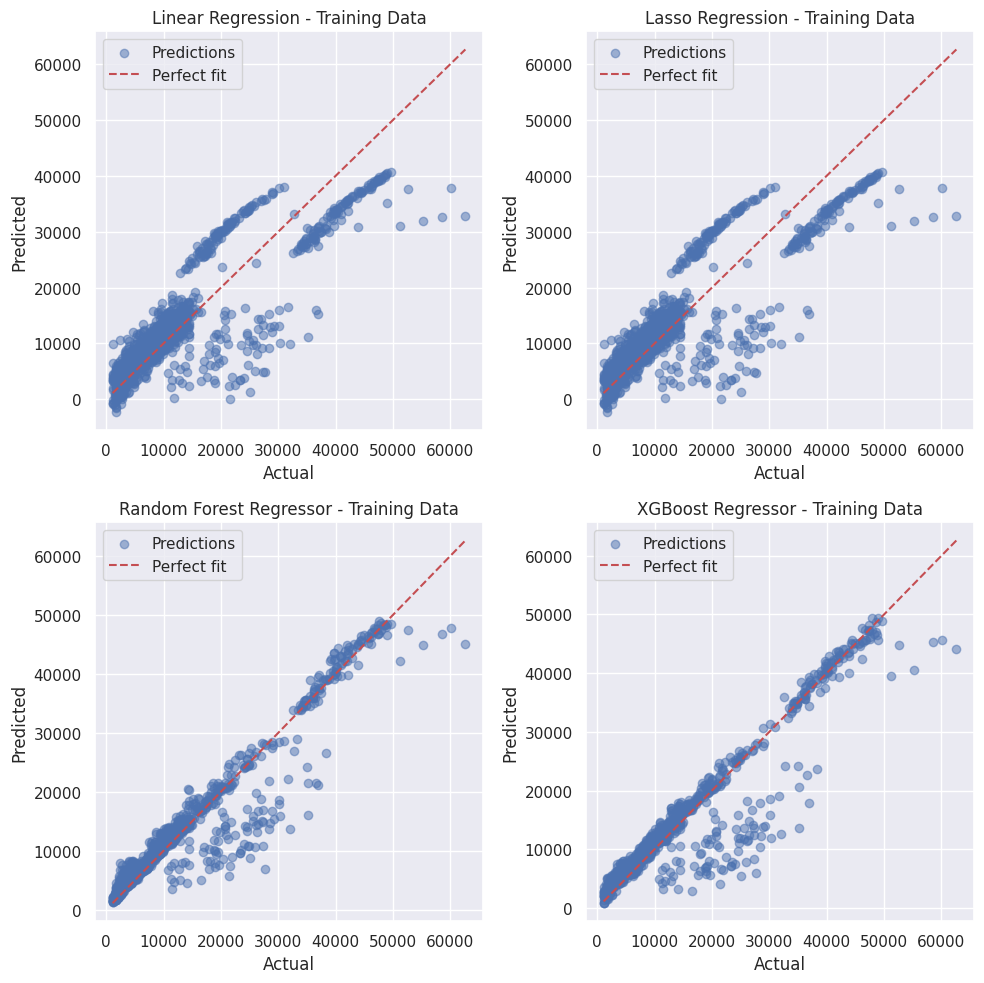

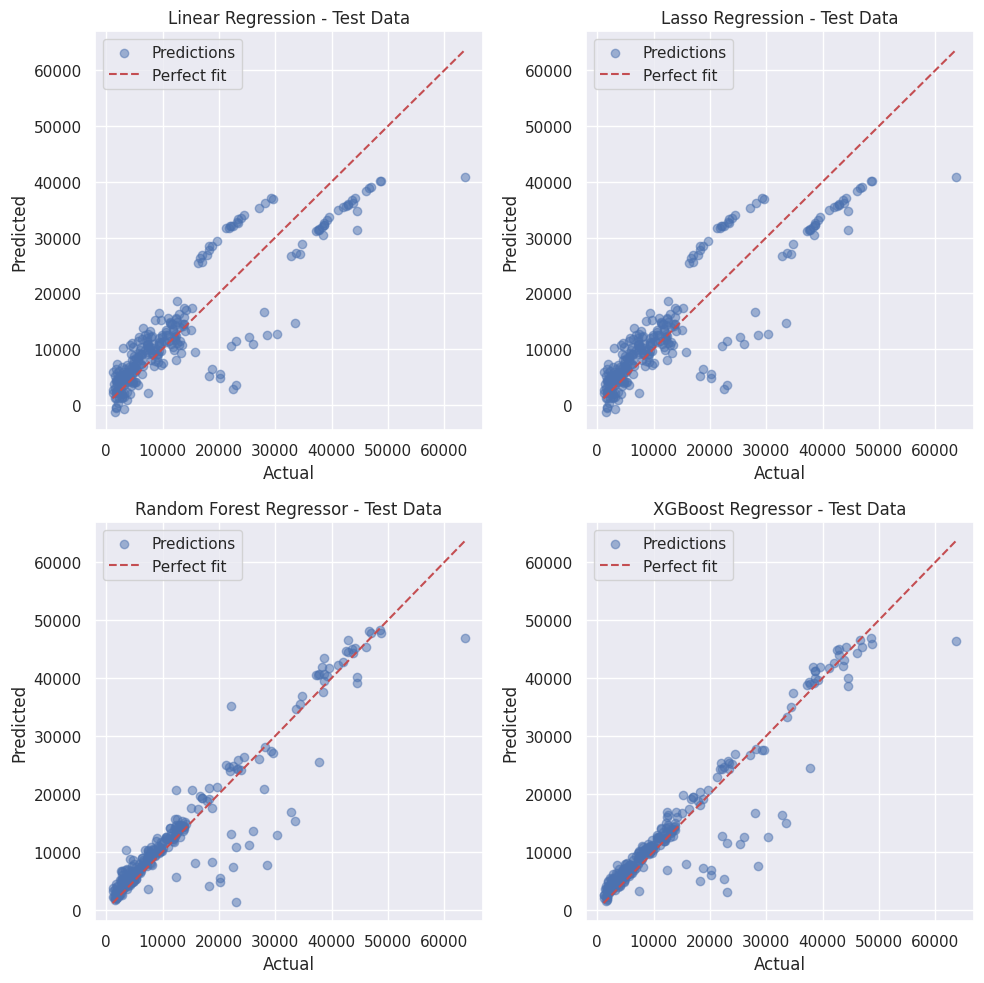

In [56]:

# Create scatter plots for training data
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()

for ax, model, predictions, actual in zip(axs, models, train_predictions, Y_train_list):
    ax.scatter(actual, predictions, alpha=0.5, label='Predictions')
    ax.plot([min(actual), max(actual)], [min(actual), max(actual)], 'r--', label='Perfect fit')
    ax.set_title(f"{model} - Training Data")
    ax.set_xlabel("Actual")
    ax.set_ylabel("Predicted")
    ax.legend()

plt.tight_layout()
plt.show()  # Shows the scatter plots for training data

# Create scatter plots for test data
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()

for ax, model, predictions, actual in zip(axs, models, test_predictions, Y_test_list):
    ax.scatter(actual, predictions, alpha=0.5, label='Predictions')
    ax.plot([min(actual), max(actual)], [min(actual), max(actual)], 'r--', label='Perfect fit')
    ax.set_title(f"{model} - Test Data")
    ax.set_xlabel("Actual")
    ax.set_ylabel("Predicted")
    ax.legend()

plt.tight_layout()
plt.show()  # Shows the scatter plots for test data


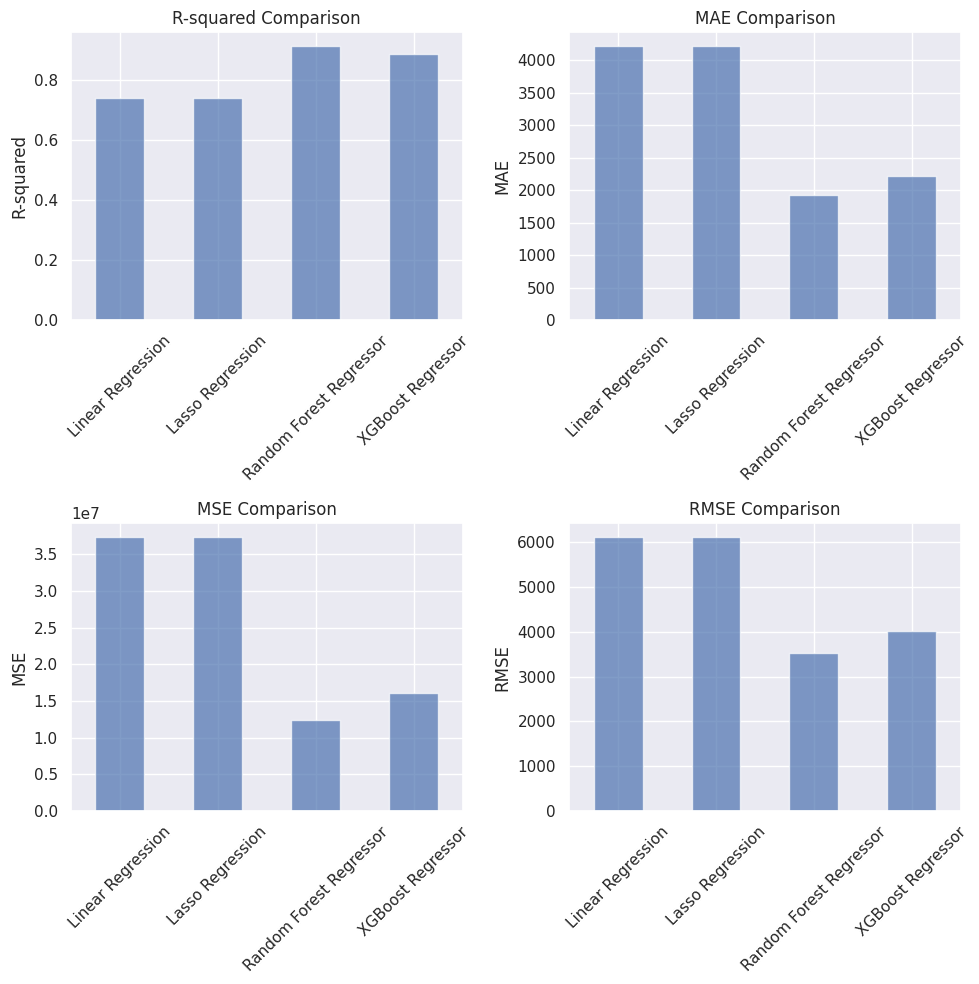

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Define the models and their performance metrics
models = ["Linear Regression", "Lasso Regression", "Random Forest Regressor", "XGBoost Regressor"]

# Metrics for the different models, rounding to four decimal places
metrics = {
    "R-squared": [round(r2_train_linear, 4), round(r2_lasso_train, 4), round(r2_rf_train, 4), round(r2_xgb_train, 4)],
    "MAE": [round(mae_train, 4), round(mae_lasso_train, 4), round(mae_rf_train, 4), round(mae_xgb_train, 4)],
    "MSE": [round(mse_train, 4), round(mse_lasso_train, 4), round(mse_rf_train, 4), round(mse_xgb_train, 4)],
    "RMSE": [round(rmse_train, 4), round(rmse_lasso_train, 4), round(rmse_rf_train, 4), round(rmse_xgb_train, 4)],
}

# Create a DataFrame to summarize the metrics, with the defined precision
metrics_df = pd.DataFrame(metrics, index=models)

# Set the display format to four decimal places to avoid scientific notation
pd.options.display.float_format = '{:.4f}'.format

# Create bar plots to compare evaluation metrics
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()

for ax, metric in zip(axs, metrics_df.columns):
    metrics_df[metric].plot(kind='bar', ax=ax, alpha=0.7)
    ax.set_title(f"{metric} Comparison")
    ax.set_ylabel(metric)
    ax.set_xticklabels(models, rotation=45)

plt.tight_layout()
plt.show()  # Displays the bar plots for evaluation metrics




In [66]:
# Create a summary table with metrics and rounding
summary_table = metrics_df.to_markdown()  # Create the summary table

# Display formatted summary table with four decimal places
print("Formatted Summary Table:")
print(summary_table)  # Displays the formatted summary table with rounded metrics

Formatted Summary Table:
|                         |   R-squared |     MAE |         MSE |    RMSE |
|:------------------------|------------:|--------:|------------:|--------:|
| Linear Regression       |      0.7413 | 4214.9  | 3.73372e+07 | 6110.42 |
| Lasso Regression        |      0.7413 | 4214.77 | 3.73372e+07 | 6110.42 |
| Random Forest Regressor |      0.9142 | 1920.34 | 1.238e+07   | 3518.52 |
| XGBoost Regressor       |      0.8882 | 2216.17 | 1.6134e+07  | 4016.72 |


### Comparison

- **Random Forest Regressor** has the highest R-squared (0.9142), indicating that it explains the most variance.
  - It also has the lowest MAE (1920.34), MSE (12380000), and RMSE (3518.52), indicating it has the lowest errors.
- **XGBoost Regressor** is next with a slightly lower R-squared (0.8882), higher MAE (2216.17), MSE (16134000), and RMSE (4016.72).
- **Linear Regression and Lasso Regression** have the same R-squared (0.7413) and similar MAE and RMSE, but they both have higher MSE compared to the other models.


### Conclusion

Based on these metrics, **Random Forest Regressor** performs better overall because it has the best R-squared, MAE, MSE, and RMSE values, indicating it explains the most variance while having the lowest errors.


Building a Predictive System

In [67]:
import pickle  # To save and load the model and scaler
import numpy as np
import pandas as pd

# Save the best Random Forest model to a file
model_filename = "random_forest_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(best_rf, file)  # Save the trained model

# Assume you have a scaler used for standardization, save it too
scaler_filename = "scaler.pkl"
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)  # Save the scaler


In [70]:

# Load the model and scaler (to ensure they're saved properly)
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)  # Load the Random Forest model

with open(scaler_filename, 'rb') as file:
    loaded_scaler = pickle.load(file)  # Load the scaler

# Define the new input data to be predicted
input_data = {
    "age": 25,  # Integer
    "sex": 1,  # 1 for Male, 0 for Female (assuming this encoding)
    "bmi": 27.5,  # Float
    "children": 2,  # Integer
    "smoker": 0,  # 1 for Smoker, 0 for Non-smoker
    "region": 3  # Integer (region encoding, such as 0=North, 1=South, etc.)
}

# Convert to DataFrame to pass into the model
input_df = pd.DataFrame([input_data])

# Scale the input data using the scaler
scaled_input = loaded_scaler.transform(input_df)  # Apply the scaler to the input data

# Make predictions with the loaded model
prediction = loaded_model.predict(scaled_input)

# Output the predicted value, rounded to two decimal places
formatted_prediction = "{:.2f}".format(prediction[0])

print("Predicted output:", formatted_prediction)  # Display the prediction result with two decimal places


Predicted output: 19121.77
